<a href="https://colab.research.google.com/github/Adamixa/Data_field_job_analysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Field Jobs Analysis

### 1. Data Loading and Initial Exploration:

Load the selected dataset into your preferred data analysis environment.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

df = pd.read_csv('/content/jobs_in_data_2024 (1).csv', sep = ',') # to read file

In [ ]:
df # to view the dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
...,...,...,...,...,...,...,...,...,...,...,...,...
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research


Explore the structure of the dataset (number of rows and columns, data types, etc.).

In [ ]:
num_rows, num_cols = df.shape # num of cols and rows
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 14199
Number of columns: 12


In [ ]:
df.dtypes # every column's type

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
work_setting          object
company_location      object
company_size          object
job_category          object
dtype: object

Examine the first few rows of the dataset to understand its contents

In [ ]:
df.head(3) # show the first 3 rows


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization


In [ ]:
df.tail(3) # show last 3 rows


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research
14198,2020,Entry-level,Contract,Business Data Analyst,100000,USD,100000,United States,Remote,United States,L,Data Analysis


In [ ]:
df.sample(3) # 3 randoms rows

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
3406,2024,Senior,Full-time,Research Scientist,440000,USD,440000,United States,In-person,United States,M,Data Science and Research
8622,2023,Mid-level,Full-time,Data Scientist,50000,GBP,61520,United Kingdom,Remote,United Kingdom,M,Data Science and Research
4215,2023,Senior,Full-time,Data Analyst,146850,USD,146850,United States,In-person,United States,M,Data Analysis


In [ ]:
df.columns # names of dataframe


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'work_setting', 'company_location', 'company_size', 'job_category'],
      dtype='object')

[Jobs%20and%20Sal.pdf](https://Jobs%20and%20Sal.pdf)

### 2. Data Cleaning:

Handle missing values appropriately (e.g., imputation, deletion, etc.).

In [ ]:
miss_values = df.isnull().sum() # to check missing values
miss_values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64

Check for and handle any duplicate entries.

In [ ]:
dup_rows = df.duplicated() # check for duplicate each row
dup_rows

0        False
1        False
2        False
3        False
4        False
         ...  
14194    False
14195    False
14196    False
14197    False
14198    False
Length: 14199, dtype: bool

Convert categorical variables into the appropriate data type if necessary

In [ ]:
df['salary'] = df['salary'].astype(float) # convert salary column from int to float
df.dtypes


work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd           int64
employee_residence     object
work_setting           object
company_location       object
company_size           object
job_category           object
dtype: object

In [ ]:
df['salary_in_usd'] = df['salary_in_usd'].astype(float) # convert salary in usd column from int to float
df.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd         float64
employee_residence     object
work_setting           object
company_location       object
company_size           object
job_category           object
dtype: object

Dealing with outliers:

In [ ]:
df.describe()

,work_year,salary,salary_in_usd
count,14199.000000,14199.000000,14199.00000
mean,2023.110501,149057.514262,149472.04944
std,0.686929,64932.044143,64379.26016
min,2020.000000,14000.000000,15000.00000
25%,2023.000000,102150.000000,104000.00000
50%,2023.000000,142000.000000,142000.00000
75%,2024.000000,185900.000000,185900.00000
max,2024.000000,450000.000000,450000.00000


In [ ]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3-Q1

In [ ]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [ ]:
lower_lim

-18850.0

In [ ]:
upper_lim

308750.0

In [ ]:
outliers_low = (df['salary_in_usd'] < lower_lim)
outliers_high = (df['salary_in_usd'] > upper_lim)
len(df['salary_in_usd']) - (len(df['salary_in_usd'][outliers_low])+(len(df['salary_in_usd'][outliers_high])))

13938

In [ ]:
df['salary_in_usd'][outliers_high | outliers_low]

19       322000.0
53       331292.0
86       363000.0
88       345000.0
110      440000.0
           ...   
14001    450000.0
14131    416000.0
14148    325000.0
14192    423000.0
14195    412000.0
Name: salary_in_usd, Length: 261, dtype: float64

In [ ]:
df['salary_in_usd'][~(outliers_high | outliers_low)]

0         30000.0
1        230000.0
2        176900.0
3        171210.0
4         92190.0
           ...   
14193     28369.0
14194    165000.0
14196    151000.0
14197    105000.0
14198    100000.0
Name: salary_in_usd, Length: 13938, dtype: float64

In [ ]:
df = df[~(outliers_high | outliers_low)]

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category,employee_expat
0,2024,Entry-level,Freelance,Applied Data Scientist,30000.0,USD,30000.0,United Kingdom,Remote,United Kingdom,M,Data Science and Research,True
1,2024,Executive,Full-time,Business Intelligence,230000.0,USD,230000.0,United States,In-person,United States,M,BI and Visualization,True
2,2024,Executive,Full-time,Business Intelligence,176900.0,USD,176900.0,United States,In-person,United States,M,BI and Visualization,True
3,2024,Senior,Full-time,Data Architect,171210.0,USD,171210.0,Canada,In-person,Canada,M,Data Architecture and Modeling,True
4,2024,Senior,Full-time,Data Architect,92190.0,USD,92190.0,Canada,In-person,Canada,M,Data Architecture and Modeling,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14193,2021,Mid-level,Full-time,Data Engineer,24000.0,EUR,28369.0,Malta,Hybrid,Malta,L,Data Engineering,True
14194,2021,Senior,Full-time,Data Specialist,165000.0,USD,165000.0,United States,Remote,United States,L,Data Management and Strategy,True
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000.0,USD,151000.0,United States,Remote,United States,L,Data Science and Research,True
14197,2020,Entry-level,Full-time,Data Scientist,105000.0,USD,105000.0,United States,Remote,United States,S,Data Science and Research,True


### 3. Exploratory Data Analysis:

Conduct univariate analysis to understand the distribution of individual variables (e.g., listing prices, number of reviews, etc.).

In [ ]:
df.describe() # summary statistics mean, std, min and max

,work_year,salary,salary_in_usd
count,13938.000000,13938.000000,13938.000000
mean,2023.107619,145344.224781,145732.962979
std,0.686725,59321.183266,58609.942677
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,100000.000000,102000.000000
50%,2023.000000,140000.000000,140000.000000
75%,2024.000000,185000.000000,184950.000000
max,2024.000000,409500.000000,308000.000000


In [ ]:
df.describe(include='object') # for non numerical

,experience_level,employment_type,job_title,salary_currency,employee_residence,work_setting,company_location,company_size,job_category
count,13938,13938,13938,13938,13938,13938,13938,13938,13938
unique,4,4,147,12,86,3,74,3,10
top,Senior,Full-time,Data Engineer,USD,United States,In-person,United States,M,Data Science and Research
freq,9179,13880,3033,12892,12167,9205,12213,12870,4564


In [ ]:
df['salary'].describe() # statistics of the salary column mean, std, min and max

count     13938.000000
mean     145344.224781
std       59321.183266
min       14000.000000
25%      100000.000000
50%      140000.000000
75%      185000.000000
max      409500.000000
Name: salary, dtype: float64

In [ ]:
df['work_setting'].describe() # statistics of the work_setting column

count         13938
unique            3
top       In-person
freq           9205
Name: work_setting, dtype: object

In [ ]:
df['job_title'].describe() # statistics of the job_title column

count             13938
unique              147
top       Data Engineer
freq               3033
Name: job_title, dtype: object

In [ ]:
saudi_arabia_data = df[df['company_location'] == 'Saudi Arabia'] # filtering to include only rows where location company is Saudi Arbia
saudi_arabia_data


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category,employee_expat
140,2024,Senior,Full-time,AI Research Scientist,150000.0,USD,150000.0,Saudi Arabia,Hybrid,Saudi Arabia,M,Data Science and Research,True
9493,2023,Mid-level,Full-time,Machine Learning Research Engineer,90000.0,USD,90000.0,Saudi Arabia,Remote,Saudi Arabia,M,Data Science and Research,True
10169,2023,Mid-level,Full-time,Staff Data Analyst,179998.0,USD,179998.0,Saudi Arabia,Remote,Saudi Arabia,S,Data Analysis,True


Perform bivariate analysis to explore relationships between variables (e.g., price vs. property type, price vs. neighborhood, etc.).

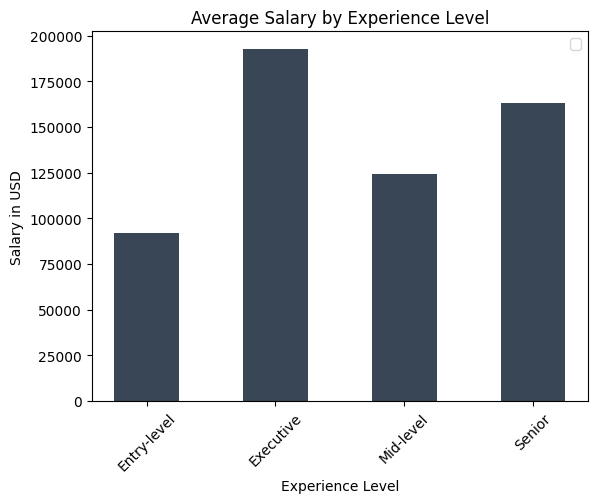

In [46]:
average_salary = df.groupby('experience_level')['salary_in_usd'].mean() # calc avg salary by experience level

experience_levels = average_salary.index
x = np.arange(len(experience_levels)) # Get unique experience levels and their indices

bar_width = 0.50

plt.bar(x, average_salary, width=bar_width, color='#384655') # grouped bar chart
plt.xticks(x, experience_levels, rotation=45)

plt.xlabel('Experience Level') # lables and title
plt.ylabel('Salary in USD')
plt.title('Average Salary by Experience Level')

plt.legend()
plt.show()

This Bar Chart shows us the relationship between Average Salary and Experience level.

As we see Executive receives hightest salary.

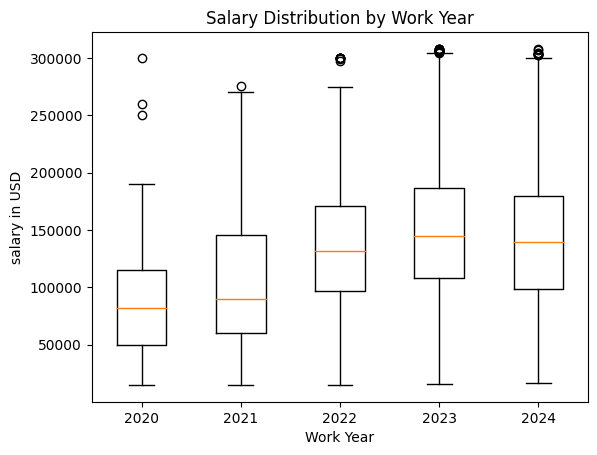

In [ ]:

grouped_data = df.groupby('work_year')['salary_in_usd']

fig, ax = plt.subplots()
ax.boxplot([grouped_data.get_group(year) for year in grouped_data.groups.keys()])

plt.title('Salary Distribution by Work Year')
plt.xlabel('Work Year')
plt.ylabel('salary in USD')


ax.set_xticklabels(grouped_data.groups.keys())

plt.show()

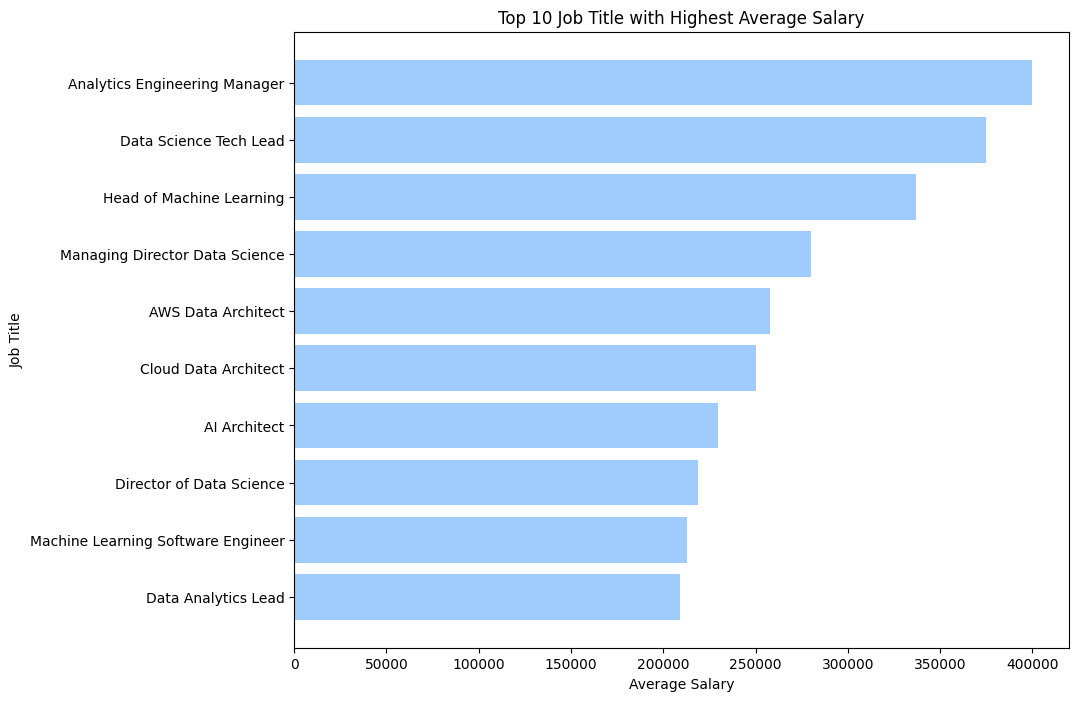

In [48]:
average_salary_by_country = df.groupby('job_title')['salary_in_usd'].mean() # calc the avg salary by country

top_10_countries = average_salary_by_country.nlargest(10) # sort the countries by avg salary and select the top 10
sorted_countries = top_10_countries.sort_values(ascending=True)

plt.figure(figsize=(10, 8)) # horizontal bar chart to show the top 10 countries and their avg salary
plt.barh(sorted_countries.index, sorted_countries.values, color = '#9fcbfd')

plt.xlabel('Average Salary in USD') # labels and title
plt.ylabel('Job Title')
plt.title('Top 10 Job Title with Highest Average Salary')

plt.show()

 This relationship to get which job title get highest average salary , and It has been analyzed and shown to us Data Science Tech lead recevies the hightes average salary

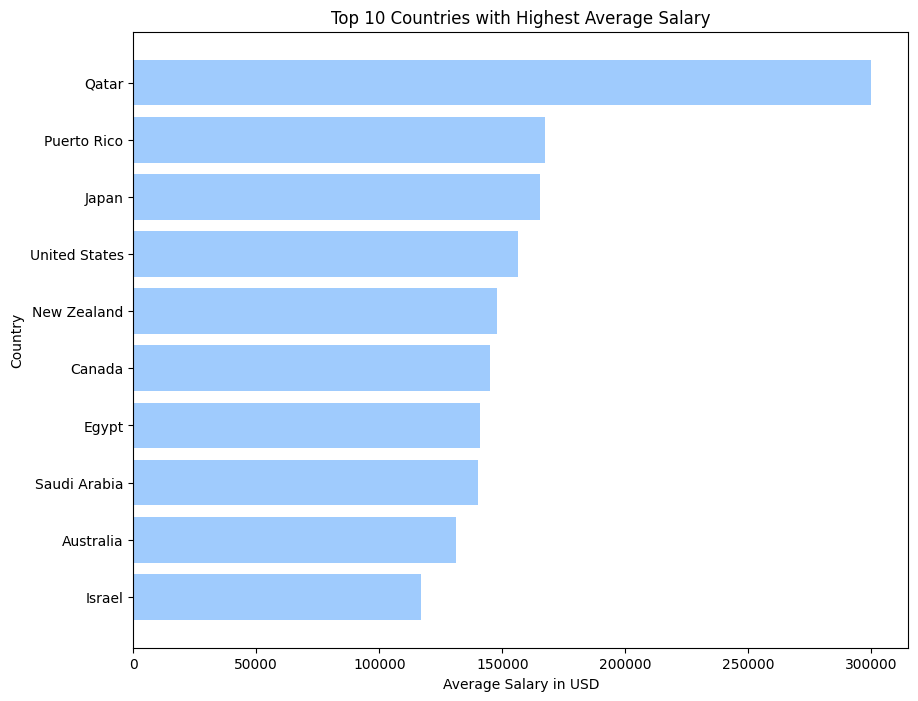

In [49]:
average_salary_by_country = df.groupby('company_location')['salary_in_usd'].mean() # calc the avg salary by country

top_10_countries = average_salary_by_country.nlargest(10) # sort the countries by avg salary and select the top 10
sorted_countries = top_10_countries.sort_values(ascending=True)

plt.figure(figsize=(10, 8)) # horizontal bar chart to show the top 10 countries and their avg salary
plt.barh(sorted_countries.index, sorted_countries.values, color = '#9fcbfd')

plt.xlabel('Average Salary in USD') # labels and title
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Average Salary')

plt.show()

Bar chart representation that displays categorical data with rectangular bar.

This horizontal bar chart shows the top 10 countries and their average salary.

This relationship to get which country paid the highest average salary , and It has been analyzed and shown to us Qatar is paid hightes average salary.

Visualize the data using appropriate plots (e.g., histograms, box plots, scatter plots, etc.).


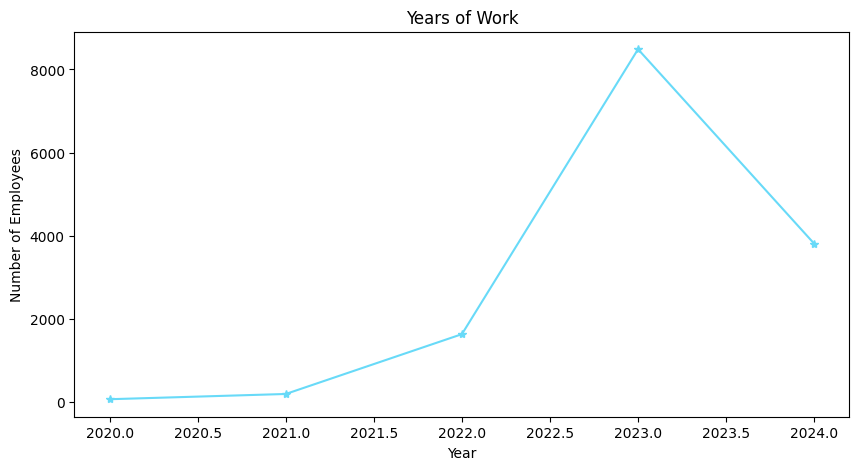

In [50]:
plt.figure(figsize=(10,5))
year_counts = df['work_year'].value_counts().sort_index()

plt.plot(year_counts.index, year_counts.values, marker='*',linestyle='-',color="#68daf8")

plt.xlabel("Year", color = 'black' )
plt.ylabel("Number of Employees", color = 'black')
plt.title("Years of Work", color = 'black')

plt.show()

As we see, we can conclude that the dataset includes work year from 2020 to 2024 with the highest amount of data from the year 2023

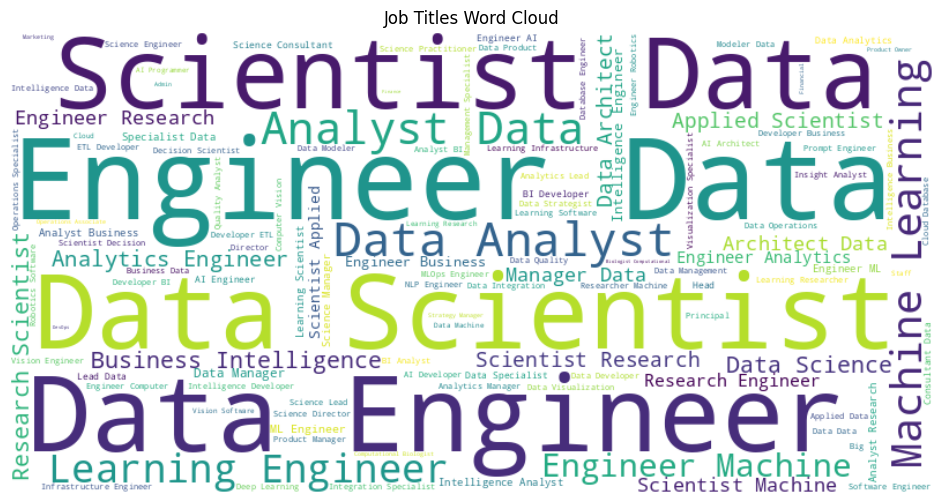

In [51]:
job_title = ' '.join(df['job_title'].dropna().values) # create string of all job titles

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_title) # the word cloud

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Job Titles Word Cloud')
plt.show()

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

As we see the most represented word is Data Engineer and Data Scientist.

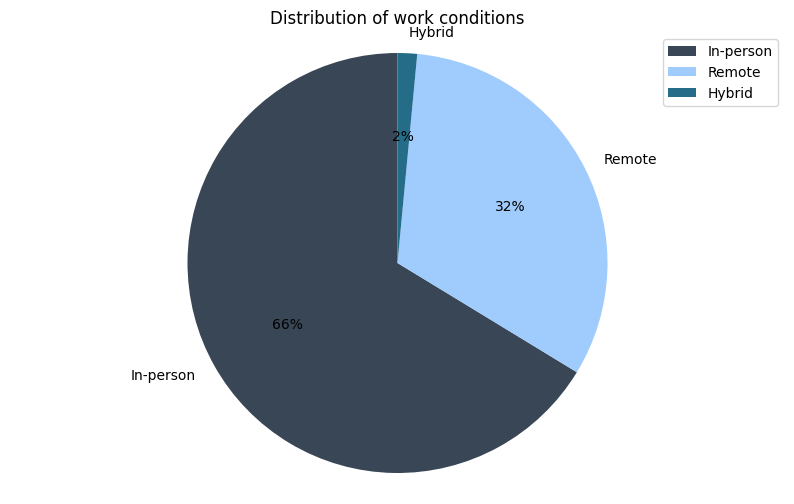

In [52]:
category_counts = df['work_setting'].value_counts()
custom_colors = ['#384655', '#9fcbfd', '#246C88', '#FFDE59']

plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.0f%%', startangle=90, colors=custom_colors)
plt.axis('equal')
plt.title('Distribution of work conditions')


plt.legend(labels=category_counts.index, loc='best')

plt.show()

A pie chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data.

This Pie Chart shows the percentage of work conditions

*   Hybird
*   Remote
*   In person






Calculate summary statistics for relevant variables.

In [ ]:
summary_stats_numerical = df.describe() # calc summary statistics for all numerical var
summary_stats_numerical

,work_year,salary,salary_in_usd
count,13938.000000,13938.000000,13938.000000
mean,2023.107619,145344.224781,145732.962979
std,0.686725,59321.183266,58609.942677
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,100000.000000,102000.000000
50%,2023.000000,140000.000000,140000.000000
75%,2024.000000,185000.000000,184950.000000
max,2024.000000,409500.000000,308000.000000


### 4. Feature Engineering:

Create new features that might be useful for analysis (e.g., average rating, occupancy rate, etc.).

In [ ]:
avg_salary_by_job = df.groupby('job_title')['salary_in_usd'].mean() # calc avg salary for unique jobs
unique_jobs = df['job_title'].unique()
sample_data = pd.DataFrame({'avg_salary_in_usd_by_job': avg_salary_by_job[unique_jobs]})
sample_data

,avg_salary_in_usd_by_job
job_title,
Applied Data Scientist,78216.545455
Business Intelligence,149104.190476
Data Architect,159030.561765
Data Science,156956.620112
Insight Analyst,46459.916667
...,...
Marketing Data Analyst,144327.000000
Data Analytics Engineer,78839.400000
Cloud Data Architect,250000.000000


In [ ]:
data_work = df['work_year'].value_counts().reset_index() # calc the frequency occurrences for each unique value in work year
data_work.columns = ['work_year', 'count']
data_work = data_work.sort_values(by = 'count', ascending=False)
print(data_work)

   work_year  count
0       2023   8333
1       2024   3718
2       2022   1624
3       2021    195
4       2020     68


In [ ]:
data_job = df['job_category'].value_counts().reset_index() # calc the frequency of occurrences for each unique job category
data_job.columns = ['Job_Category', 'Count']
data_job = data_job.sort_values(by='Count', ascending=False)
print(data_job)

                     Job_Category  Count
0       Data Science and Research   4564
1                Data Engineering   3129
2                   Data Analysis   2199
3         Machine Learning and AI   2052
4       Leadership and Management    777
5            BI and Visualization    600
6  Data Architecture and Modeling    412
7    Data Management and Strategy    115
8     Data Quality and Operations     79
9              Cloud and Database     11


In [ ]:
data_engineer_df = df[df['job_title'] == 'Data Engineer'] # filter for data engineers

avg_salary_data_engineer = data_engineer_df['salary_in_usd'].mean() # calc avg salary for data engineers
print("Average Salary for Data Engineers in USD:", avg_salary_data_engineer)

Average Salary for Data Engineers in USD: 145585.98285525883


In [ ]:
average_salary_by_country = df.groupby('employee_residence')['salary_in_usd'].mean() # calc avg salary by country

average_salary_saudi_arabia = average_salary_by_country.loc['Saudi Arabia']
print("Average Salary for Saudi Arabia in USD:", average_salary_saudi_arabia)

Average Salary for Saudi Arabia in USD: 139999.33333333334


In [ ]:
df['employee_expat'] = ~(df['employee_residence'] == df['company_location']) # create a feature for is_employee_expat

df['employee_expat'].sample(15) # the employee residence and company location if the same


<ipython-input-84-677ca93d507e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['employee_expat'] = ~(df['employee_residence'] == df['company_location']) # create a feature for is_employee_expat


2781     False
8472     False
10905    False
229      False
6918     False
7576     False
4697     False
8035     False
9927     False
6036     False
13150    False
3631     False
11680    False
2693     False
2713     False
Name: employee_expat, dtype: bool

Encode categorical variables if necessary (e.g., one-hot encoding, label encoding, etc.).

In [ ]:
df_encoded = pd.get_dummies(df, columns=['work_setting']) # one-hot encoding on work conditions
df_encoded

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,company_size,job_category,employee_expat,work_setting_Hybrid,work_setting_In-person,work_setting_Remote
0,2024,Entry-level,Freelance,Applied Data Scientist,30000.0,USD,30000.0,United Kingdom,United Kingdom,M,Data Science and Research,False,0,0,1
1,2024,Executive,Full-time,Business Intelligence,230000.0,USD,230000.0,United States,United States,M,BI and Visualization,False,0,1,0
2,2024,Executive,Full-time,Business Intelligence,176900.0,USD,176900.0,United States,United States,M,BI and Visualization,False,0,1,0
3,2024,Senior,Full-time,Data Architect,171210.0,USD,171210.0,Canada,Canada,M,Data Architecture and Modeling,False,0,1,0
4,2024,Senior,Full-time,Data Architect,92190.0,USD,92190.0,Canada,Canada,M,Data Architecture and Modeling,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14193,2021,Mid-level,Full-time,Data Engineer,24000.0,EUR,28369.0,Malta,Malta,L,Data Engineering,False,1,0,0
14194,2021,Senior,Full-time,Data Specialist,165000.0,USD,165000.0,United States,United States,L,Data Management and Strategy,False,0,0,1
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000.0,USD,151000.0,United States,United States,L,Data Science and Research,False,0,0,1
14197,2020,Entry-level,Full-time,Data Scientist,105000.0,USD,105000.0,United States,United States,S,Data Science and Research,False,0,0,1


### 6. Conclusion:

### Summarize the findings from the exploratory data analysis.


* We got summary statistics of all numerical columns for mean, std, min and max.
* We got summary statistics of salary column for mean, std, min and max.
* We got summary statistics of job setting column for count, unique, top and frequncy.
* We got summary statistics of job title column for count, unique, top and frequncy.
* We filtering Dataframe to include only rows where company location is Saudi Arabia.
* We performed bivariate analysis about experience level and salary we chose bar chart cause it is suitable for this relationship, and It has been analyzed and shown to us Exective level recevies the highest salary.
* We performed bivariate analysis about job title and salary we chose bar chart cause it is suitable for this relationship to get which job title get highest average salary , and It has been analyzed and shown to us Data Science Tech lead recevies the hightes average salary.
* We performed bivariate analysis about job title and salary we chose bar chart cause it is suitable for this relationship to get which country paid the highest average salary , and It has been analyzed and shown to us Qatar is paid hightes average salary.
* We performed Visualize the job title column using word cloud to get the most represented job to indicates its frequency and its shown to us the most represented job is Data Enginner.
* This Pie Chart shows the percentage/proportions of work conditions, and we got these catagories and their %

*   Hybird 2%
*   Remote 32%
*   In person 66%


Discuss any insights or patterns observed in the data.

Make recommendations based on the analysis conducted.